In [7]:
# -*- coding: utf-8 -*-
"""
examples file for a tutorial paper on data assimilation
"PyDA: A hands-on introduction to dynamical data assimilation with Python"
@authors: Shady E. Ahmed, Suraj Pawar, Omer San
"""

import numpy as np

def Lorenz63(state,*args): #Lorenz 96 model
    #rho = 28.0     #sigma = 10.0     #beta = 8.0 / 3.0
    
    sigma = args[0]
    beta = args[1]
    rho = args[2]
    x, y, z = state #Unpack the state vector
    f = np.zeros(3) #Derivatives
    f[0] = sigma * (y - x)
    f[1] = x * (rho - z) - y
    f[2] = x * y - beta * z
    return f 

def JLorenz63(state,*args): #Jacobian of Lorenz 63 model
    #rho = 28.0     #sigma = 10.0     #beta = 8.0 / 3.0
    
    sigma = args[0]
    beta = args[1]
    rho = args[2]
    x, y, z = state #Unpack the state vector
    df = np.zeros([3,3]) #Derivatives
   
    df[0,0] = sigma * (-1)
    df[0,1] = sigma * (1)
    df[0,2] = sigma * (0)

    df[1,0] = 1 * (rho - z) 
    df[1,1] = -1
    df[1,2] = x * (-1)

    df[2,0] = 1 * y 
    df[2,1] = x * 1 
    df[2,2] = - beta

    return df 



def Lorenz96(state,*args): # Lorenz 96 model
    x = state
    F = args[0]
    n = len(x)    
    f = np.zeros(n)
    # bounday points: i=0,1,N-1
    f[0] = (x[1] - x[n-2]) * x[n-1] - x[0]
    f[1] = (x[2] - x[n-1]) * x[0] - x[1]
    f[n-1] = (x[0] - x[n-3]) * x[n-2] - x[n-1]
    for i in range(2, n-1):
        f[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
    # Add the forcing term
    f = f + F

    return f


def JLorenz96(state,*args): #Jacobian of Lorenz 96 model
    x = state
    F = args[0]
    n = len(x)    
    df = np.zeros([n,n])
    # bounday points: i=0,1,N-1
    df[0,0] = -1
    df[0,1] = x[n-1]
    df[0,n-1] = (x[1] - x[n-2])
    df[0,n-2] = -x[n-1]

    df[1,0] = (x[2] - x[n-1])
    df[1,1] = -1
    df[1,2] = x[0]
    df[1,n-1] = -x[0]

    df[n-1,0] =  x[n-2]
    df[n-1,n-1] = -1
    df[n-1,n-2] = (x[0] - x[n-3])
    df[n-1,n-3] = -x[n-2]
    
    for i in range(2, n-1):
        df[i,i] = -1
        df[i,i+1] = x[i-1]
        df[i,i-1] = x[i+1] - x[i-2]
        df[i,i-2] = -x[i-1]

    return df



def Burgers1D(state,*args):
    
    u = state
    nu = args[0]
    dx = args[1]
    nx = len(u) - 1
    f = np.zeros(nx+1)
    f[1:nx] = (nu/(dx*dx))*(u[2:nx+1] - 2*u[1:nx] + u[0:nx-1]) \
             - (1.0/3.0)*(u[2:nx+1]+u[0:nx-1]+u[1:nx])*(u[2:nx+1]-u[0:nx-1])/(2.0*dx) 
             
    return f

In [8]:
# -*- coding: utf-8 -*-
"""
Time integration routines for a tutorial paper on data assimilation
"PyDA: A hands-on introduction to dynamical data assimilation with Python"
@authors: Shady E. Ahmed, Suraj Pawar, Omer San
"""


import numpy as np

def euler(rhs,state,dt,*args):
    
    k1 = rhs(state,*args)   
    new_state = state + dt*k1
    return new_state

def Jeuler(rhs,Jrhs,state,dt,*args):
    
    n = len(state)
    k1 = rhs(state,*args)
    dk1 = Jrhs(state,*args)
    DM = np.eye(n) + dt*dk1
    return DM


def RK4(rhs,state,dt,*args):
    
    k1 = rhs(state,*args)
    k2 = rhs(state+k1*dt/2,*args)
    k3 = rhs(state+k2*dt/2,*args)
    k4 = rhs(state+k3*dt,*args)

    new_state = state + (dt/6)*(k1+2*k2+2*k3+k4)
    return new_state


def JRK4(rhs,Jrhs,state,dt,*args):
    
    n = len(state)
    k1 = rhs(state,*args)
    k2 = rhs(state+k1*dt/2,*args)
    k3 = rhs(state+k2*dt/2,*args)
    #k4 = rhs(state+k3*dt,*args)
    
    dk1 = Jrhs(state,*args)
    dk2 = Jrhs(state+k1*dt/2,*args) @ (np.eye(n)+dk1*dt/2) 
    dk3 = Jrhs(state+k2*dt/2,*args) @ (np.eye(n)+dk2*dt/2) 
    dk4 = Jrhs(state+k3*dt,*args) @ (np.eye(n)+dk3*dt) 

    DM = np.eye(n) + (dt/6) * (dk1+2*dk2+2*dk3+dk4)
    return DM

C:\Users\murat\AppData\Local\Temp/ipykernel_14768/3644601207.py:99: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
C:\Users\murat\AppData\Local\Temp/ipykernel_14768/3644601207.py:100: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\boldmath']


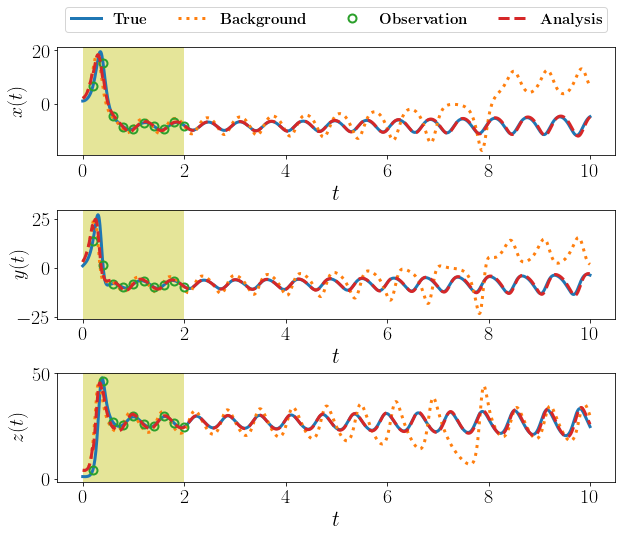

In [12]:
## 3D VAR

def Lin3dvar(ub,w,H,R,B,opt):
    
    # The solution of the 3DVAR problem in the linear case requires 
    # the solution of a linear system of equations.
    # Here we utilize the built-in numpy function to do this.
    # Other schemes can be used, instead.
    
    if opt == 1: #model-space approach
        Bi = np.linalg.inv(B)
        Ri = np.linalg.inv(R)
        A = Bi + (H.T)@Ri@H
        b = Bi@ub + (H.T)@Ri@w
        ua = np.linalg.solve(A,b) #solve a linear system 
    
    elif opt == 2: #model-space incremental approach
        
        Bi = np.linalg.inv(B)
        Ri = np.linalg.inv(R)
        A = Bi + (H.T)@Ri@H
        b = (H.T)@Ri@(w-H@ub)
        ua = ub + np.linalg.solve(A,b) #solve a linear system 
        
        
    elif opt == 3: #observation-space incremental approach
    
        A = R + H@B@(H.T)
        b = (w-H@ub)
        ua = ub + B@(H.T)@np.linalg.solve(A,b) #solve a linear system
        
    return ua


#%% Application: Lorenz 63

# parameters
sigma = 10.0     
beta = 8.0/3.0
rho = 28.0     
dt = 0.01
tm = 10
nt = int(tm/dt)
t = np.linspace(0,tm,nt+1)


############################ Twin experiment ##################################

u0True = np.array([1,1,1]) # True initial conditions
np.random.seed(seed=1)
sig_m= 0.15  # standard deviation for measurement noise
R = sig_m**2*np.eye(3) #covariance matrix for measurement noise
H = np.eye(3) #linear observation operator

dt_m = 0.2 #time period between observations
tm_m = 2 #maximum time for observations
nt_m = int(tm_m/dt_m) #number of observation instants

#t_m = np.linspace(dt_m,tm_m,nt_m) #np.where( (t<=2) & (t%0.1==0) )[0]
ind_m = (np.linspace(int(dt_m/dt),int(tm_m/dt),nt_m)).astype(int)
t_m = t[ind_m]

#time integration
uTrue = np.zeros([3,nt+1])
uTrue[:,0] = u0True
km = 0
w = np.zeros([3,nt_m])
for k in range(nt):
    uTrue[:,k+1] = RK4(Lorenz63,uTrue[:,k],dt,sigma,beta,rho)
    if (km<nt_m) and (k+1==ind_m[km]):
        w[:,km] = H@uTrue[:,k+1] + np.random.normal(0,sig_m,[3,])
        km = km+1
   
########################### Data Assimilation #################################

u0b = np.array([2.0,3.0,4.0])

sig_b= 0.1
B = sig_b**2*np.eye(3)

#time integration
ub = np.zeros([3,nt+1])
ub[:,0] = u0b
ua = np.zeros([3,nt+1])
ua[:,0] = u0b
km = 0
for k in range(nt):
    ub[:,k+1] = RK4(Lorenz63,ub[:,k],dt,sigma,beta,rho)
    ua[:,k+1] = RK4(Lorenz63,ua[:,k],dt,sigma,beta,rho)

    if (km<nt_m) and (k+1==ind_m[km]):
        ua[:,k+1] = Lin3dvar(ua[:,k+1],w[:,km],H,R,B,3)  
        km = km+1


############################### Plotting ######################################
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10,8))
ax = ax.flat

for k in range(3):
    ax[k].plot(t,uTrue[k,:], label=r'\bf{True}', linewidth = 3)
    ax[k].plot(t,ub[k,:], ':', label=r'\bf{Background}', linewidth = 3)
    ax[k].plot(t[ind_m],w[k,:], 'o', fillstyle='none', \
               label=r'\bf{Observation}', markersize = 8, markeredgewidth = 2)
    ax[k].plot(t,ua[k,:], '--', label=r'\bf{Analysis}', linewidth = 3)
    ax[k].set_xlabel(r'$t$',fontsize=22)
    ax[k].axvspan(0, tm_m, color='y', alpha=0.4, lw=0)

ax[0].legend(loc="center", bbox_to_anchor=(0.5,1.25),ncol =4,fontsize=15)

ax[0].set_ylabel(r'$x(t)$', labelpad=5)
ax[1].set_ylabel(r'$y(t)$', labelpad=-12)
ax[2].set_ylabel(r'$z(t)$')
fig.subplots_adjust(hspace=0.5)
plt.show()

Convergence: loss function
127


C:\Users\murat\AppData\Local\Temp/ipykernel_14768/937968258.py:249: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
C:\Users\murat\AppData\Local\Temp/ipykernel_14768/937968258.py:250: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\boldmath']


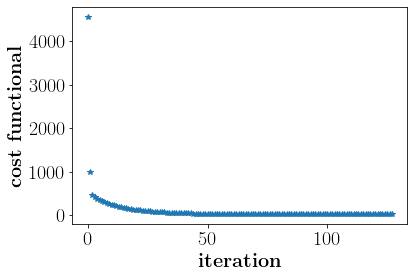

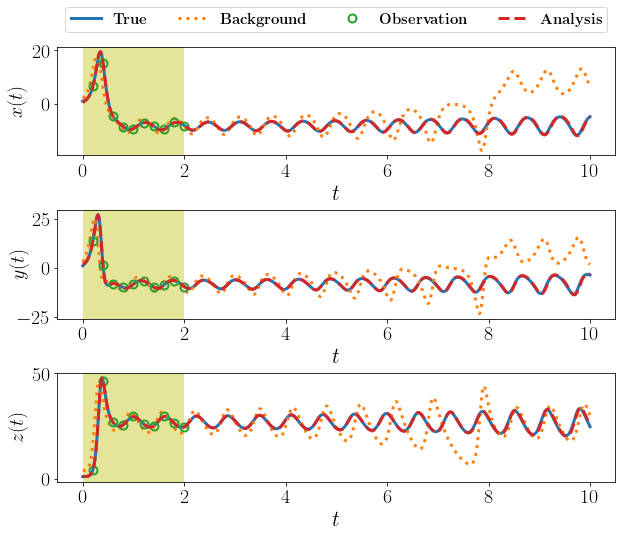

In [13]:
## 4D VAR
# -*- coding: utf-8 -*-
"""
Demonstration of the 4DVAR method using the Lorenz63 system 
"PyDA: A hands-on introduction to dynamical data assimilation with Python"
@authors: Shady E. Ahmed, Suraj Pawar, Omer San
"""


import numpy as np
import matplotlib.pyplot as plt
from examples import *
from time_integrators import *

def Adj4dvar(rhs,Jrhs,ObsOp,JObsOp,t,ind_m,u0b,w,R,opt,*args):
    
    # The solution of the 4DVAR problem requires the evaluation of 
    # the forward model to generate base trajectory and 
    # the Jacobian of the model to solve the adjoint problem.
    # Inputs:
        #rhs: defines the right-hand side of the continuous time forward model f(u;mu)
        #Jrhs: defines the Jacobian matrix of rhs D_f(u)
        #ObsOp: defines the observation operator h(u)
        #JObsOp: defines the Jacobian of the observation operator D_h(u)
        #t: vector of time
        #ind_m: indices of measurement instants
        #u0b: initial condition for base trajectory
        #w: matrix of measurements
        #R: covariance matrix of measurement noise
        #opt: [0=euler] or [1=RK4] defines the time integration scheme to 
              #comptue the discrete-time forward map and its Jacobian
    # Output: The Jacobian of the cost functional
    
    n = len(u0b)
    #determine the assimilation window
    t = t[:ind_m[-1]+1] #cut the time till the last observation point 
    nt = len(t)-1
    dt = t[1] - t[0]
    ub = np.zeros([n,nt+1]) #base trajectory
    lam = np.zeros([n,nt+1]) #lambda sequence
    fk = np.zeros([n,len(ind_m)])
    
    Ri = np.linalg.inv(R)

    ub[:,0] = u0b
    if opt == 0: #Euler
        #forward model
        for k in range(nt):
            ub[:,k+1] = euler(rhs,ub[:,k],dt,*args)
            
        #backward adjoint
        k = ind_m[-1]
        fk[:,-1] = (JObsOp(ub[:,k])).T @ Ri @ (w[:,-1] - ObsOp(ub[:,k]))
        lam[:,k] = fk[:,-1] #lambda_N = f_N
        
        km = len(ind_m)-2
        for k in range(ind_m[-1],0,-1):
            DM = Jeuler(rhs,Jrhs,ub[:,k-1],dt,*args)
            lam[:,k-1] =  (DM).T @ lam[:,k] 
            if k-1 == ind_m[km]:
                fk[:,km] =(JObsOp(ub[:,k-1])).T @ Ri @ (w[:,km] - ObsOp(ub[:,k-1]))
                lam[:,k-1] = lam[:,k-1] + fk[:,km]
                km = km - 1

    elif opt == 1: #RK4
        # forward model
        for k in range(nt):
            ub[:,k+1] = RK4(rhs,ub[:,k],dt,*args)
            
        #backward adjoint
        k = ind_m[-1]
        fk[:,-1] = (JObsOp(ub[:,k])).T @ Ri @ (w[:,-1] - ObsOp(ub[:,k]))
        lam[:,k] = fk[:,-1] #lambda_N = f_N
        
        km = len(ind_m)-2
        for k in range(ind_m[-1],0,-1):
            DM = JRK4(rhs,Jrhs,ub[:,k-1],dt,*args)
            lam[:,k-1] =  (DM).T @ lam[:,k] 
            if k-1 == ind_m[km]:
                fk[:,km] = (JObsOp(ub[:,k-1])).T @ Ri @ (w[:,km] - ObsOp(ub[:,k-1]))
                lam[:,k-1] = lam[:,k-1] + fk[:,km]
                km = km - 1
        
    dJ0 = -lam[:,0]     
    return dJ0


# Loss function (w-h(u))^T * R^{-1} * (w-h(u))
def loss(rhs,ObsOp,t,ind_m,u0,w,R,opt,*args):
    
    n = len(u0)
    #determine the assimilation window
    t = t[:ind_m[-1]+1] #cut the time till the last observation point 
    nt = len(t)-1
    dt = t[1] - t[0]
    u = np.zeros([n,nt+1]) #trajectory

    u[:,0] = u0

    Ri = np.linalg.inv(R)
    floss = 0 
    km = 0
    nt_m = len(ind_m)
    if opt == 0: #Euler
        #forward model
        for k in range(nt):
            u[:,k+1] = euler(rhs,u[:,k],dt,*args)
            
            if (km<nt_m) and (k+1==ind_m[km]):
                tmp = w[:,km] - ObsOp(u[:,k+1])
                tmp = tmp.reshape(-1,1)
                floss = floss + np.linalg.multi_dot(( tmp.T, Ri , tmp ))
                km = km + 1

    elif opt == 1: #RK4
        # forward model
        for k in range(nt):
            u[:,k+1] = RK4(rhs,u[:,k],dt,*args)
            if (km<nt_m) and (k+1==ind_m[km]):
                tmp = w[:,km] - ObsOp(u[:,k+1])
                tmp = tmp.reshape(-1,1)
                floss = floss + np.linalg.multi_dot(( tmp.T, Ri , tmp ))
                km = km + 1

    floss = floss[0,0]/2
    return floss
        

def GoldenAlpha(p,rhs,ObsOp,t,ind_m,u0,w,R,opt,*args):
    
    # p is the optimization direction
    a0=0
    b0=1
    r=(3-np.sqrt(5))/2
    
    uncert = 1e-5 # Specified uncertainty
    
    a1= a0 + r*(b0-a0);
    b1= b0 - r*(b0-a0);
    while (b0-a0) > uncert:
    
        if loss(rhs,ObsOp,t,ind_m,u0+a1*p,w,R,opt,*args)  <  loss(rhs,ObsOp,t,ind_m,u0+b1*p,w,R,opt,*args):  
            b0=b1;
            b1=a1;
            a1= a0 + r*(b0-a0);
        else:
            a0=a1;
            a1=b1;
            b1= b0 - r*(b0-a0);
    alpha = (b0+a0)/2

    return alpha

#%% Application: Lorenz 63

# parameters
sigma = 10.0     
beta = 8.0/3.0
rho = 28.0     
dt = 0.01
tm = 10 
nt = int(tm/dt)
t = np.linspace(0,tm,nt+1)

############################ Twin experiment ##################################
# Observation operator
def h(u):
    w = u
    return w

def Dh(u):
    n = len(u)
    D = np.eye(n)
    return D


u0True = np.array([1,1,1]) # True initial conditions
np.random.seed(seed=1)
sig_m= 0.15  # standard deviation for measurement noise
R = sig_m**2*np.eye(3) #covariance matrix for measurement noise

dt_m = 0.2 #time period between observations
tm_m = 2 #maximum time for observations
nt_m = int(tm_m/dt_m) #number of observation instants

ind_m = (np.linspace(int(dt_m/dt),int(tm_m/dt),nt_m)).astype(int)
t_m = t[ind_m]

#time integration
uTrue = np.zeros([3,nt+1])
uTrue[:,0] = u0True
km = 0
w = np.zeros([3,nt_m])
for k in range(nt):
    uTrue[:,k+1] = RK4(Lorenz63,uTrue[:,k],dt,sigma,beta,rho)
    if (km<nt_m) and (k+1==ind_m[km]):
        w[:,km] = h(uTrue[:,k+1]) + np.random.normal(0,sig_m,[3,])
        km = km+1
   
########################### Data Assimilation #################################
u0b = np.array([2.0,3.0,4.0])
u0a = u0b
J0 = loss(Lorenz63,h,t,ind_m,u0a,w,R,1,sigma,beta,rho)
for iter in range(200):
    
    #computing the gradient of cost functional with base trajectory
    dJ = Adj4dvar(Lorenz63,JLorenz63,h,Dh,t,ind_m,u0a,w,R,1,sigma,beta,rho)
    #minimization direction
    p = -dJ/np.linalg.norm(dJ) 
    #Golden method for linesearch
    alpha = GoldenAlpha(p,Lorenz63,h,t,ind_m,u0a,w,R,1,sigma,beta,rho)   
    #update initial condition with gradient descent
    u0a = u0a + alpha*p  
    
    J = loss(Lorenz63,h,t,ind_m,u0a,w,R,1,sigma,beta,rho)
    
    plt.figure(1)
    plt.plot(iter,J,'*',color='C0')
    plt.xlabel(r'\bf{iteration}')
    plt.ylabel(r'\bf{cost functional}')
    
    if np.abs(J0-J) < 1e-2:
        print('Convergence: loss function')
        print(iter)
        break
    else:
        J0=J
    if np.linalg.norm(dJ) < 1e-4:
        print('Convergence: gradient of loss function')
        print(iter)
        break
#%%
##################### Time Integration [Comparison] ###########################

ub = np.zeros([3,nt+1])
ub[:,0] = u0b
ua = np.zeros([3,nt+1])
ua[:,0] = u0a
km = 0
for k in range(nt):
    ub[:,k+1] = RK4(Lorenz63,ub[:,k],dt,sigma,beta,rho)
    ua[:,k+1] = RK4(Lorenz63,ua[:,k],dt,sigma,beta,rho)


#%%
############################### Plotting ######################################
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10,8))
ax = ax.flat

for k in range(3):
    ax[k].plot(t,uTrue[k,:], label=r'\bf{True}', linewidth = 3)
    ax[k].plot(t,ub[k,:], ':', label=r'\bf{Background}', linewidth = 3)
    ax[k].plot(t[ind_m],w[k,:], 'o', fillstyle='none', \
               label=r'\bf{Observation}', markersize = 8, markeredgewidth = 2)
    ax[k].plot(t,ua[k,:], '--', label=r'\bf{Analysis}', linewidth = 3)
    ax[k].set_xlabel(r'$t$',fontsize=22)
    ax[k].axvspan(0, tm_m, color='y', alpha=0.4, lw=0)

ax[0].legend(loc="center", bbox_to_anchor=(0.5,1.25),ncol =4,fontsize=15)

ax[0].set_ylabel(r'$x(t)$', labelpad=5)
ax[1].set_ylabel(r'$y(t)$', labelpad=-12)
ax[2].set_ylabel(r'$z(t)$')
fig.subplots_adjust(hspace=0.5)
plt.show()

C:\Users\murat\AppData\Local\Temp/ipykernel_14768/316161612.py:130: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
C:\Users\murat\AppData\Local\Temp/ipykernel_14768/316161612.py:131: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\boldmath']


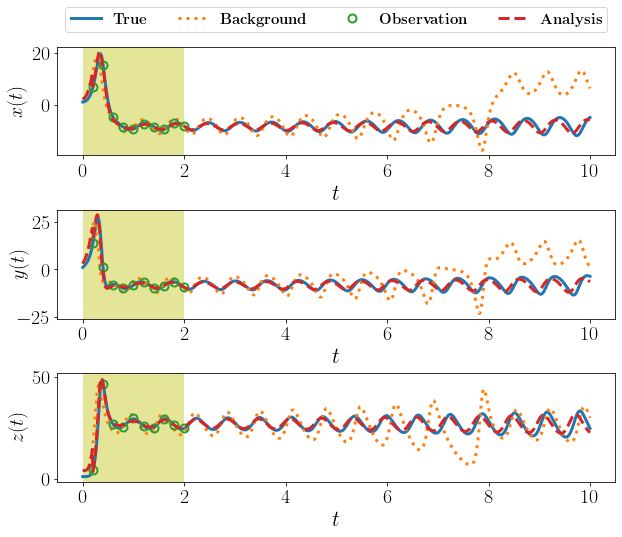

In [14]:
# EKF
# -*- coding: utf-8 -*-
"""
Demonstration of the EKF method using the Lorenz63 system 
"PyDA: A hands-on introduction to dynamical data assimilation with Python"
@authors: Shady E. Ahmed, Suraj Pawar, Omer San
"""


import numpy as np
import matplotlib.pyplot as plt
from examples import *
from time_integrators import *

def KF(ub,w,H,R,B):
    
    # The analysis step for the Kalman filter in the linear case
    # i.e., linear model M and linear observation operator H 
    
    n = ub.shape[0]
    # compute Kalman gain
    D = H@B@H.T + R
    K = B @ H.T @ np.linalg.inv(D)
    
    # compute analysis
    ua = ub + K @ (w-H@ub)
    P = (np.eye(n) - K@H) @ B   
    return ua, P


def EKF(ub,w,ObsOp,JObsOp,R,B):
    
    # The analysis step for the extended Kalman filter for nonlinear dynamics
    # and nonlinear observation operator
    
    n = ub.shape[0]
    # compute Jacobian of observation operator at ub
    Dh = JObsOp(ub)
    # compute Kalman gain
    D = Dh@B@Dh.T + R
    K = B @ Dh.T @ np.linalg.inv(D)
    
    # compute analysis
    ua = ub + K @ (w-ObsOp(ub))
    P = (np.eye(n) - K@Dh) @ B   
    return ua, P



#%% Application: Lorenz 63

# parameters
sigma = 10.0     
beta = 8.0/3.0
rho = 28.0     
dt = 0.01
tm = 10
nt = int(tm/dt)
t = np.linspace(0,tm,nt+1)

############################ Twin experiment ##################################
# Observation operator
def h(u):
    w = u
    return w

def Dh(u):
    n = len(u)
    D = np.eye(n)
    return D


u0True = np.array([1,1,1]) # True initial conditions
np.random.seed(seed=1)
sig_m= 0.15  # standard deviation for measurement noise
R = sig_m**2*np.eye(3) #covariance matrix for measurement noise

dt_m = 0.2 #time period between observations
tm_m = 2 #maximum time for observations
nt_m = int(tm_m/dt_m) #number of observation instants

ind_m = (np.linspace(int(dt_m/dt),int(tm_m/dt),nt_m)).astype(int)
t_m = t[ind_m]

#time integration
uTrue = np.zeros([3,nt+1])
uTrue[:,0] = u0True
km = 0
w = np.zeros([3,nt_m])
for k in range(nt):
    uTrue[:,k+1] = RK4(Lorenz63,uTrue[:,k],dt,sigma,beta,rho)
    if (km<nt_m) and (k+1==ind_m[km]):
        w[:,km] = h(uTrue[:,k+1]) + np.random.normal(0,sig_m,[3,])
        km = km+1
   
########################### Data Assimilation #################################

u0b = np.array([2.0,3.0,4.0])

sig_b= 0.1
B = sig_b**2*np.eye(3)
Q = 0.0*np.eye(3)

#time integration
ub = np.zeros([3,nt+1])
ub[:,0] = u0b
ua = np.zeros([3,nt+1])
ua[:,0] = u0b
km = 0
for k in range(nt):
    # Forecast Step
    #background trajectory [without correction]
    ub[:,k+1] = RK4(Lorenz63,ub[:,k],dt,sigma,beta,rho) 
    #EKF trajectory [with correction at observation times]
    ua[:,k+1] = RK4(Lorenz63,ua[:,k],dt,sigma,beta,rho)
    #compute model Jacobian at t_k
    DM = JRK4(Lorenz63,JLorenz63,ua[:,k],dt,sigma,beta,rho)
    #propagate the background covariance matrix
    B = DM @ B @ DM.T + Q   

    if (km<nt_m) and (k+1==ind_m[km]):
        # Analysis Step
        ua[:,k+1],B = EKF(ua[:,k+1],w[:,km],h,Dh,R,B)
        km = km+1


############################### Plotting ######################################
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10,8))
ax = ax.flat

for k in range(3):
    ax[k].plot(t,uTrue[k,:], label=r'\bf{True}', linewidth = 3)
    ax[k].plot(t,ub[k,:], ':', label=r'\bf{Background}', linewidth = 3)
    ax[k].plot(t[ind_m],w[k,:], 'o', fillstyle='none', \
               label=r'\bf{Observation}', markersize = 8, markeredgewidth = 2)
    ax[k].plot(t,ua[k,:], '--', label=r'\bf{Analysis}', linewidth = 3)
    ax[k].set_xlabel(r'$t$',fontsize=22)
    ax[k].axvspan(0, tm_m, color='y', alpha=0.4, lw=0)

ax[0].legend(loc="center", bbox_to_anchor=(0.5,1.25),ncol =4,fontsize=15)

ax[0].set_ylabel(r'$x(t)$', labelpad=5)
ax[1].set_ylabel(r'$y(t)$', labelpad=-12)
ax[2].set_ylabel(r'$z(t)$')
fig.subplots_adjust(hspace=0.5)
plt.show()